In [2]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.lines import Line2D
from tqdm import *
from itertools import compress
%matplotlib inline  

In [3]:
def combine_background_files(folder='../data/bkg_Zj/', lumi=37*1000, nfiles=200):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    
    evt_frames = [pd.read_csv(folder+'events_'+str(i)+'.evt', header=0, delimiter=',', skipinitialspace=True) for i in range(nfiles)]
    good_frames = np.array([len(evt_frame) for evt_frame in evt_frames]) > 0
    
    evt_frames = list(compress(evt_frames, good_frames))
    meta_frames = [pd.read_csv(folder+'events_'+str(i)+'.meta', header=0, delimiter=',', skipinitialspace=True) for i in compress(range(nfiles),good_frames)]
    for evt_frame, meta_frame in zip(evt_frames, meta_frames):
        evt_frame['weight'] *= (meta_frame['cxn']*lumi/meta_frame['sum_weight'])[0]
        
    data = pd.concat(evt_frames)
    return data

In [31]:
# Zj_df = combine_background_files('../data/bkg_Zj/', nfiles=200)
# Wj_df = combine_background_files('../data/bkg_Wj/', nfiles=200)
# tt_d_df = combine_background_files('../data/bkg_ttbar_dilep//', nfiles=200)
# tt_s_df = combine_background_files('../data/bkg_ttbar_semilep//', nfiles=200)
QCD_df = combine_background_files('../data/bkg_qcd//', nfiles=600)


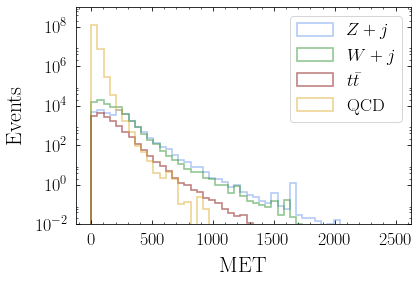

In [32]:
bins = np.linspace(0,2500,50)

normed = False

plt.hist(Zj_df['MEt'], weights=Zj_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$Z+j$", normed=normed)
plt.hist(Wj_df['MEt'], weights=Wj_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$W+j$", normed=normed)

tt_df = pd.concat([tt_d_df, tt_s_df])
# tt_df = pd.concat([tt_s_df])

# plt.hist(tt_d_df['MEt'], weights=tt_d_df['weight'], 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="$t\\bar t$", normed=normed)

plt.hist(tt_s_df['MEt'], weights=tt_s_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="$t\\bar t$", normed=normed)



# plt.hist(tt_df['MEt'], weights=tt_df['weight'], 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="$t\\bar t$", normed=normed)

plt.hist(QCD_df['MEt'], weights=QCD_df['weight'], 
                     bins=bins,
                     histtype='step', alpha=.5, lw=1.6, label="QCD", normed=normed)

# plt.hist(QCD_nobias_df['MEt'], weights=QCD_nobias_df['weight'], 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="QCD nobias", normed=normed)


plt.xlabel("MET")

plt.ylim(1e-2,1e9)
plt.legend()
plt.ylabel("Events")
plt.yscale("log")

In [29]:
def combine_signal_files(folder='../data/bkg_Zj/', mphi = 1700, rinv = 0.9, lumi=37*1000, nfiles=200):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    
    evt_frames = [pd.read_csv(folder+'events_'+str(mphi)+"_"+str(rinv)+"_"+str(i)+'.evt', header=0, delimiter=',', skipinitialspace=True) for i in range(nfiles)]
    good_frames = np.array([len(evt_frame) for evt_frame in evt_frames]) > 0
    
    evt_frames = list(compress(evt_frames, good_frames))
    meta_frames = [pd.read_csv(folder+'events_'+str(mphi)+"_"+str(rinv)+"_"+str(i)+'.meta', header=0, delimiter=',', skipinitialspace=True) for i in compress(range(nfiles),good_frames)]
    for evt_frame, meta_frame in zip(evt_frames, meta_frames):
        evt_frame['weight'] *= (meta_frame['cxn']*lumi/meta_frame['sum_weight'])[0]
        
    data = pd.concat(evt_frames)
    return data

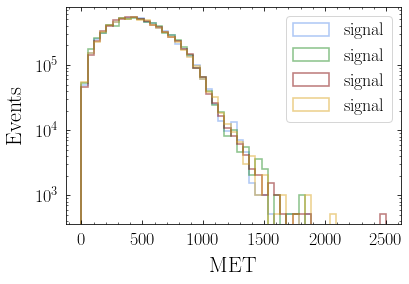

In [35]:
sig = [combine_signal_files("../data/sig_tchannel/", mphi = m, nfiles=4) for m in [500,700, 900,2100]]

bins = np.linspace(0,2500,50)

normed = False

for i in range(len(sig)):
    plt.hist(sig[i]['MEt'], weights=sig[i]['weight'], 
                         bins=bins,
                         histtype='step', alpha=.5, lw=1.6, label="signal", normed=normed)

# plt.hist(Zj_df['MEt'], weights=Zj_df['weight']*5000, 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="$Z+j$", normed=normed)
# plt.hist(Wj_df['MEt'], weights=Wj_df['weight']*5000, 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="$W+j$", normed=normed)

# # tt_df = pd.concat([tt_d_df, tt_s_df])
# tt_df = pd.concat([tt_s_df])


# plt.hist(tt_df['MEt'], weights=tt_df['weight']*5000, 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="$t\\bar t$", normed=normed)

# plt.hist(QCD_df['MEt'], weights=QCD_df['weight']*5000, 
#                      bins=bins,
#                      histtype='step', alpha=.5, lw=1.6, label="QCD", normed=normed)

# # plt.hist(QCD_nobias_df['MEt'], weights=QCD_nobias_df['weight'], 
# #                      bins=bins,
# #                      histtype='step', alpha=.5, lw=1.6, label="QCD nobias", normed=normed)





plt.xlabel("MET")


plt.legend()
plt.ylabel("Events")
plt.yscale("log")